In [1]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tqdm
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [105]:

data = pd.read_csv('preprocessed_data.csv')
y=data.project_is_approved
data.drop(columns={"project_is_approved"},axis=0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [106]:
print("No of datapoints in train:",len(X_train)," ",len(X_train)/len((data)))
print("No of datapoints in test:",len(X_test)," ",len(X_test)/len((data)))
print("No of datapoints in cv:",len(X_cv)," ",len(X_cv)/len((data)))

No of datapoints in train: 69918   0.6399934094903339
No of datapoints in test: 21850   0.20000366139425893
No of datapoints in cv: 17480   0.16000292911540714


### <h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>**bold text**

In [107]:
vectorizer=CountVectorizer(lowercase=True,stop_words='english', ngram_range=(1, 1), analyzer='word', 
                           min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_train_bow=vectorizer.transform(X_train["essay"].values)
essay_test_bow=vectorizer.transform(X_test['essay'].values)
essay_cv_bow=vectorizer.transform(X_cv["essay"].values)


In [108]:
print(essay_train_bow.shape)
print(essay_test_bow.shape)
print(essay_cv_bow.shape)


(69918, 5000)
(21850, 5000)
(17480, 5000)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [109]:
vectorizer=CountVectorizer()
school_state=data.school_state
vectorizer.fit(X_train['school_state'])
train_school_bow=vectorizer.transform(X_train['school_state'])
test_school_bow=vectorizer.transform(X_test['school_state'])
cv_school_bow=vectorizer.transform(X_cv['school_state'])

In [110]:
teacher_prefix=data.teacher_prefix
vectorizer.fit(X_train['teacher_prefix'])
train_teacher_bow=vectorizer.transform(X_train['teacher_prefix'])
test_teacher_bow=vectorizer.transform(X_test['teacher_prefix'])
cv_teacher_bow=vectorizer.transform(X_cv['teacher_prefix'])

In [111]:
project_grade_category=data.project_grade_category
vectorizer.fit(X_train['project_grade_category'])
train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'])
test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'])
cv_project_grade_category_bow=vectorizer.transform(X_cv['project_grade_category'])

In [112]:
clean_categories=data.clean_categories
vectorizer.fit(X_train['clean_categories'])
train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'])
test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'])
cv_clean_categories_bow=vectorizer.transform(X_cv['clean_categories'])


In [113]:
clean_sub_categories=data.clean_subcategories
vectorizer.fit(X_train['clean_subcategories'])
train_clean_sub_categories_bow=vectorizer.transform(X_train['clean_subcategories'])
test_clean_sub_categories_bow=vectorizer.transform(X_test['clean_subcategories'])
cv_clean_sub_categories_bow=vectorizer.transform(X_cv['clean_subcategories'])


In [114]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))


In [115]:
previously_posted_projects=data.teacher_number_of_previously_posted_projects
X_train_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [116]:
from scipy.sparse import hstack
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_train_previously_posted_projects=X_train_previously_posted_projects.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
X_test_previously_posted_projects=X_test_previously_posted_projects.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_cv_previously_posted_projects=X_cv_previously_posted_projects.reshape(-1,1)

In [117]:
X_tr=hstack((essay_train_bow,train_school_bow,train_teacher_bow,train_project_grade_category_bow,
            train_clean_categories_bow,train_clean_sub_categories_bow,X_train_price_norm,X_train_previously_posted_projects)).tocsr()
X_te=hstack((essay_test_bow,test_school_bow,test_teacher_bow,test_project_grade_category_bow,
            test_clean_categories_bow,test_clean_sub_categories_bow,X_test_price_norm,X_test_previously_posted_projects)).tocsr()
X_cv=hstack((essay_cv_bow,cv_school_bow,cv_teacher_bow,cv_project_grade_category_bow,
            cv_clean_categories_bow,cv_clean_sub_categories_bow,X_cv_price_norm,X_cv_previously_posted_projects)).tocsr()

In [118]:
print(X_train_previously_posted_projects.shape)
print(essay_train_bow.shape)
print(train_school_bow.shape)
print(train_teacher_bow.shape)
print(train_project_grade_category_bow.shape)
print(train_clean_categories_bow.shape)
print(train_clean_sub_categories_bow.shape)
print(X_train_price_norm.shape)

(69918, 1)
(69918, 5000)
(69918, 51)
(69918, 5)
(69918, 4)
(69918, 9)
(69918, 30)
(69918, 1)


In [119]:
print(X_tr.shape)
print(X_te.shape)
print(X_cv.shape)

(69918, 5101)
(21850, 5101)
(17480, 5101)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [120]:
y_train=np.array(y_train)
y_cv=np.array(y_cv)
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
parameter=np.array([10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4])


In [121]:
X_cv.shape

(17480, 5101)

In [122]:
train_acc=list()
cv_acc=list()
for i in tqdm(range((len(parameter)))):
    clf=MultinomialNB(alpha=parameter[i])
    clf.fit(X_tr.toarray(),y_train)
    cv_pred=clf.predict_proba(X_cv.toarray())
    train_pred=clf.predict_proba(X_tr.toarray())
    t=roc_auc_score(y_cv,cv_pred[:,1])
    cv_acc.append(t)
    train_acc.append(roc_auc_score(y_train,train_pred[:,1]))
    
    


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:03<00:00,  7.08s/it]


In [123]:
import math as mt
log_alpha=[]
for i in parameter:
     log_alpha.append(mt.log10(i))
print(parameter)
print(log_alpha)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


In [124]:
print(train_acc)
print(cv_acc)

[0.736959914991324, 0.7369581335336627, 0.7369409971527292, 0.7367672509024727, 0.7349908359286617, 0.7150883280538587, 0.6131009961346078, 0.5021876920962391, 0.5015690224170846]
[0.7099560601035821, 0.7099547866384267, 0.7099445989171828, 0.709858512672672, 0.708935581535886, 0.6946914407936378, 0.6045052115415369, 0.5015821658438256, 0.5014709796011003]


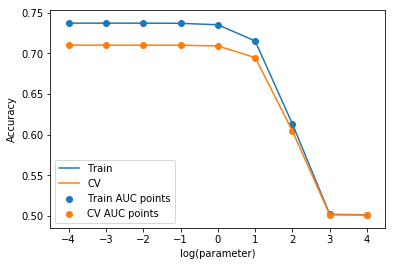

In [125]:
plt.plot(log_alpha,train_acc,label="Train")
plt.plot(log_alpha,cv_acc,label="CV")
plt.scatter(log_alpha, train_acc, label='Train AUC points')
plt.scatter(log_alpha, cv_acc, label='CV AUC points')
plt.xlabel("log(parameter)")
plt.ylabel("Accuracy")
plt.legend()

In [126]:
index=cv_acc.index(max(cv_acc))
print("Maximum Accuracy =" ,cv_acc[index])
print("Alpha Value =",parameter[index])
alpha=parameter[index]

Maximum Accuracy = 0.7099560601035821
Alpha Value = 0.0001


In [127]:
print("Train AUC at ",alpha," value is equal to ",train_acc[index])
print("CV AUC at ",alpha," value is equal to ",cv_acc[index])

Train AUC at  0.0001  value is equal to  0.736959914991324
CV AUC at  0.0001  value is equal to  0.7099560601035821


In [128]:
clf=MultinomialNB(alpha=1)
clf.fit(X_tr.toarray(),y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [129]:
test_predict=clf.predict_proba(X_te)
test_predict=np.array(test_predict)
train_predict=clf.predict_proba(X_tr)
train_predict=np.array(train_predict)

In [130]:
print(roc_auc_score(y_test,test_predict[:,1]))

0.7040856181665155


In [131]:
from sklearn.metrics import roc_curve,auc

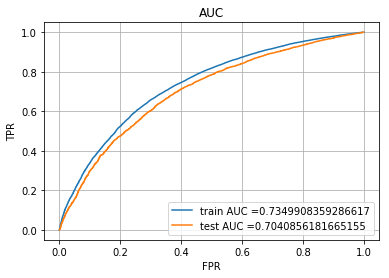

In [132]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predict[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predict[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [133]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [134]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_predict[:,1], best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_predict[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.460510377876829 for threshold 0.865
Train confusion matrix
[[ 7392  3195]
 [20199 39132]]
Test confusion matrix
[[ 2186  1122]
 [ 6479 12063]]


In [135]:
import pickle
import joblib
filename="Multinomialalgo.sav"
joblib.dump(clf,filename)

['Multinomialalgo.sav']

# USING TF-IDF

In [75]:

data = pd.read_csv('preprocessed_data.csv')
y=data.project_is_approved
data.drop(columns={"project_is_approved"},axis=0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( lowercase=True,ngram_range=(1, 1),analyzer='word', stop_words='english', 
                             norm='l2', min_df=10, max_features=5000)
vectorizer.fit(X_train.essay)
essay_train=vectorizer.transform(X_train.essay)
essay_test=vectorizer.transform(X_test.essay)
essay_cv=vectorizer.transform(X_cv.essay)


In [77]:
print("Shape of matrix after one hot encodig ",essay_train.shape)
print("Shape of matrix after one hot encodig ",essay_test.shape)
print("Shape of matrix after one hot encodig ",essay_cv.shape)

Shape of matrix after one hot encodig  (69918, 5000)
Shape of matrix after one hot encodig  (21850, 5000)
Shape of matrix after one hot encodig  (17480, 5000)


In [78]:
vectorizer=TfidfVectorizer()
school_state=data.school_state
vectorizer.fit(X_train['school_state'])
train_school_bow=vectorizer.transform(X_train['school_state'])
test_school_bow=vectorizer.transform(X_test['school_state'])
cv_school_bow=vectorizer.transform(X_cv['school_state'])

In [79]:
teacher_prefix=data.teacher_prefix
vectorizer.fit(X_train['teacher_prefix'])
train_teacher_bow=vectorizer.transform(X_train['teacher_prefix'])
test_teacher_bow=vectorizer.transform(X_test['teacher_prefix'])
cv_teacher_bow=vectorizer.transform(X_cv['teacher_prefix'])

In [80]:
project_grade_category=data.project_grade_category
vectorizer.fit(X_train['project_grade_category'])
train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'])
test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'])
cv_project_grade_category_bow=vectorizer.transform(X_cv['project_grade_category'])

In [81]:
clean_categories=data.clean_categories
vectorizer.fit(X_train['clean_categories'])
train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'])
test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'])
cv_clean_categories_bow=vectorizer.transform(X_cv['clean_categories'])


In [82]:
clean_sub_categories=data.clean_subcategories
vectorizer.fit(X_train['clean_subcategories'])
train_clean_sub_categories_bow=vectorizer.transform(X_train['clean_subcategories'])
test_clean_sub_categories_bow=vectorizer.transform(X_test['clean_subcategories'])
cv_clean_sub_categories_bow=vectorizer.transform(X_cv['clean_subcategories'])


In [83]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))


In [84]:
previously_posted_projects=data.teacher_number_of_previously_posted_projects
X_train_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [85]:
from scipy.sparse import hstack
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_train_previously_posted_projects=X_train_previously_posted_projects.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
X_test_previously_posted_projects=X_test_previously_posted_projects.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_cv_previously_posted_projects=X_cv_previously_posted_projects.reshape(-1,1)

In [86]:
X_tr=hstack((essay_train,train_school_bow,train_teacher_bow,train_project_grade_category_bow,
            train_clean_categories_bow,train_clean_sub_categories_bow,X_train_price_norm,X_train_previously_posted_projects)).tocsr()
X_te=hstack((essay_test,test_school_bow,test_teacher_bow,test_project_grade_category_bow,
            test_clean_categories_bow,test_clean_sub_categories_bow,X_test_price_norm,X_test_previously_posted_projects)).tocsr()
X_cv=hstack((essay_cv,cv_school_bow,cv_teacher_bow,cv_project_grade_category_bow,
            cv_clean_categories_bow,cv_clean_sub_categories_bow,X_cv_price_norm,X_cv_previously_posted_projects)).tocsr()

In [87]:
print(X_train_previously_posted_projects.shape)
print(essay_train.shape)
print(train_school_bow.shape)
print(train_teacher_bow.shape)
print(train_project_grade_category_bow.shape)
print(train_clean_categories_bow.shape)
print(train_clean_sub_categories_bow.shape)
print(X_train_price_norm.shape)

(69918, 1)
(69918, 5000)
(69918, 51)
(69918, 5)
(69918, 4)
(69918, 9)
(69918, 30)
(69918, 1)


In [88]:
y_train=np.array(y_train)
y_cv=np.array(y_cv)
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
parameter=np.array([10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4])


In [89]:
train_acc=list()
cv_acc=list()
for i in tqdm(range((len(parameter)))):
    clf=MultinomialNB(alpha=parameter[i])
    clf.fit(X_tr.toarray(),y_train)
    cv_pred=clf.predict_proba(X_cv.toarray())
    train_pred=clf.predict_proba(X_tr.toarray())
    t=roc_auc_score(y_cv,cv_pred[:,1])
    print(t)
    cv_acc.append(t)
    train_acc.append(roc_auc_score(y_train,train_pred[:,1]))
    
    


 11%|█████████▎                                                                          | 1/9 [00:07<01:00,  7.58s/it]

0.6807388981026923



 22%|██████████████████▋                                                                 | 2/9 [00:14<00:51,  7.37s/it]

0.6807324798383086



 33%|████████████████████████████                                                        | 3/9 [00:21<00:43,  7.22s/it]

0.6806537032837904



 44%|█████████████████████████████████████▎                                              | 4/9 [00:28<00:35,  7.12s/it]

0.679835603798604



 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:35<00:28,  7.05s/it]

0.6697707464729281



 67%|████████████████████████████████████████████████████████                            | 6/9 [00:41<00:20,  6.99s/it]

0.5974734553192398



 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:49<00:14,  7.00s/it]

0.5310806872361682



 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:56<00:07,  7.03s/it]

0.5183313653627308



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:03<00:00,  7.01s/it]

0.5194275386992689


In [90]:
print(train_acc)
print(cv_acc)

[0.7194863514051134, 0.7194700763008505, 0.7193019363089979, 0.7176223003360362, 0.7004977066343507, 0.6057288905103815, 0.53289278092334, 0.527251288184532, 0.5299379762829144]
[0.6807388981026923, 0.6807324798383086, 0.6806537032837904, 0.679835603798604, 0.6697707464729281, 0.5974734553192398, 0.5310806872361682, 0.5183313653627308, 0.5194275386992689]


In [91]:
import math as mt
log_alpha=[]
for i in parameter:
    log_alpha.append(mt.log(i))

In [92]:
parameter


array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

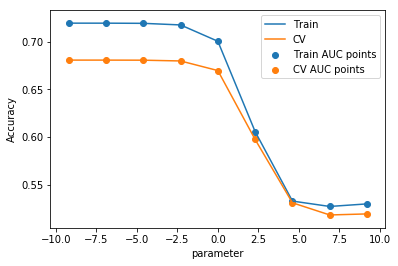

In [93]:
plt.plot(log_alpha,train_acc,label="Train")
plt.plot(log_alpha,cv_acc,label="CV")
plt.scatter(log_alpha, train_acc, label='Train AUC points')
plt.scatter(log_alpha, cv_acc, label='CV AUC points')
plt.xlabel("parameter")
plt.ylabel("Accuracy")
plt.legend()

In [94]:
index=cv_acc.index(max(cv_acc))
print("Maximum Accuracy =" ,cv_acc[index])
print("Alpha Value =",parameter[index])

Maximum Accuracy = 0.6807388981026923
Alpha Value = 0.0001


In [95]:
clf=MultinomialNB(alpha=parameter[index])
clf.fit(X_tr.toarray(),y_train)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [96]:
test_predict=clf.predict_proba(X_te)
test_predict=np.array(test_predict)
train_predict=clf.predict_proba(X_tr)
train_predict=np.array(train_predict)

In [97]:
print(roc_auc_score(y_test,test_predict[:,1]))

0.6844840766092393


In [98]:
from sklearn.metrics import roc_curve,auc

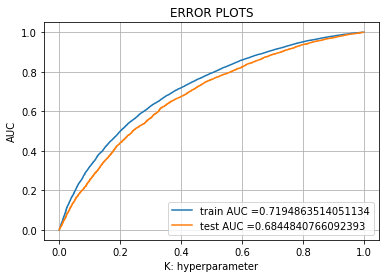

In [99]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predict[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predict[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [100]:
import pickle
import joblib
filename="Multinomialtfidf.sav"
joblib.dump(clf,filename)

['Multinomialtfidf.sav']

In [101]:
from sklearn.metrics import roc_curve,auc

In [102]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [103]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(train_predict[:,1], best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(test_predict[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.4403721691437788 for threshold 0.846
Train confusion matrix
[[ 6962  3625]
 [19599 39732]]
Test confusion matrix
[[ 2012  1296]
 [ 6151 12391]]


Summary

# SUMMARY

In [137]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","HyperParameter","Vectorizer","Test AUC","Train AUC"]
x.add_row(["Multinomial Naive Bayes", 0.0001, 'BOW',0.70,0.73])
x.add_row(["Multinomial Naive Bayes",0.0001,"TF-IDF",0.6844,0.7194])
print(x)

+-------------------------+----------------+------------+----------+-----------+
|          Model          | HyperParameter | Vectorizer | Test AUC | Train AUC |
+-------------------------+----------------+------------+----------+-----------+
| Multinomial Naive Bayes |     0.0001     |    BOW     |   0.7    |    0.73   |
| Multinomial Naive Bayes |     0.0001     |   TF-IDF   |  0.6844  |   0.7194  |
+-------------------------+----------------+------------+----------+-----------+
